## Tensorflow - Fractal Dynamical Systems    

With Tensorflow, formalize how to work with what's described at the end of Techniques in Fractal Geometry by Kenneth Falconer: "there are certain circumstances when it is appropriate to seek solutions of a 'differential equation' defined on a set that is itself fractal, <b>for example when modelling conduction of</b> heat or <b>electricity through a highly porous material</b>."  

Here be buried theoretical biotech treasure guarded by mathematical dragons.  

#### General Models
* Lorenz Attractor   
* Reaction-Diffusion <i>(Future)</i>  
* Heat Equation on Regions with a Fractal Boundary <i>(Future)</i>  

#### Fractal Oscillators
* Damped SHM  
* Fitzhugh-Nagumo
* Morris-Lecar  
* Hindmarsh-Rose
* Hodgkins-Huxley    


In [2]:
# Shebang Shiznat Borgersnot
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#### Lorenz Attractor  

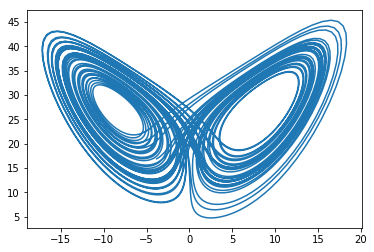

In [3]:
rho = 28.0
sigma = 10.0
beta = 8.0/3.0

def lorenz_equation(state, t):
    x, y, z = tf.unstack(state)
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return tf.stack([dx, dy, dz])

init_state = tf.constant([0, 2, 20], dtype=tf.float64)
t = np.linspace(0, 50, num=5000)
tensor_state, tensor_info = tf.contrib.integrate.odeint(
    lorenz_equation, init_state, t, full_output=True)

sess = tf.Session()
state, info = sess.run([tensor_state, tensor_info])
x, y, z = state.T
plt.plot(x, z)

#### Reaction-Diffusion Formulation  

In [4]:
# Borked until PDEs on fractal boundaries work

#### Damped SHM  

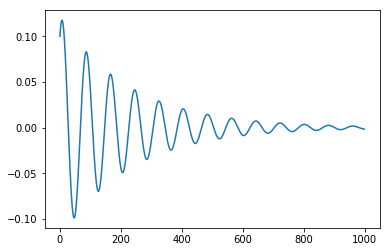

In [5]:
r = 0.035
s = 0.5
m = 0.2

def dampedshm_equation(state, t):
    x, y = tf.unstack(state)
    dx = y
    dy = (-r*y - s*x)/m
    return tf.stack([dx, dy])

init_state = tf.constant([0.1, 0.1], dtype=tf.float64)
t = np.linspace(0, 50, num=1000)
tensor_state, tensor_info = tf.contrib.integrate.odeint(
    dampedshm_equation, init_state, t, full_output=True)

sess = tf.Session()
state, info = sess.run([tensor_state, tensor_info])
x, y = state.T
plt.plot(x)

#### Fitzhugh-Nagumo  

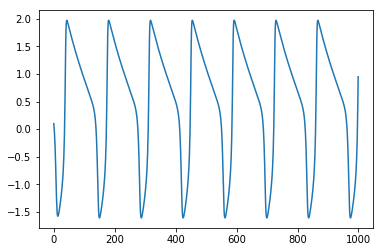

In [6]:
a = 0.75
b = 0.8
c = 3
i = -0.4

def fitzhughnagumo_equation(state, t):
    v, w = tf.unstack(state)
    dv = c*(v + w - (v**3/3) + i)
    dw = -1/c * (v - a + b*w)
    return tf.stack([dv, dw])

init_state = tf.constant([0.1, 0.1], dtype=tf.float64)
t = np.linspace(0, 100, num=1000)
tensor_state, tensor_info = tf.contrib.integrate.odeint(
    fitzhughnagumo_equation, init_state, t, full_output=True)

sess = tf.Session()
state, info = sess.run([tensor_state, tensor_info])
v, w = state.T
plt.plot(v)

#### Morris-Lecar  

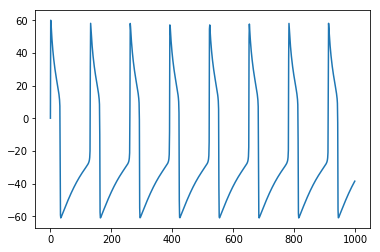

In [7]:
vk = -84
gk = 8
vca = 130
gca = 4.4
vl = -60
gl = 2
phi = 0.04
v1 = -1.2
v2 = 18
v3 = 2
v4 = 30
iapp = 80

def morrislecar_equation(state, t):
    v, n = tf.unstack(state)
    dv = (-gca*(0.5*(1 + tf.tanh((v - v1)/v2)))*(v - vca) - gk*n*(v - vk) - gl*(v - vl) + iapp)
    dn = (phi*((0.5*(1 + tf.tanh((v - v3)/v4))) - n))/(1/tf.cosh((v - v3)/(2*v4)))
    return tf.stack([dv, dn])

init_state = tf.constant([0.1, 0.1], dtype=tf.float64)
t = np.linspace(0, 500, num=1000)
tensor_state, tensor_info = tf.contrib.integrate.odeint(
    morrislecar_equation, init_state, t, full_output=True)

# How to pass in options dict arguments for the sake of memory to override the max_num_steps from the base lib 
#     ..., t, method='dopri5', options={'max_num_steps':5000}, full_output=True)

sess = tf.Session()
state, info = sess.run([tensor_state, tensor_info])
v, n = state.T
plt.plot(v)

#### Hindmarsh-Rose  

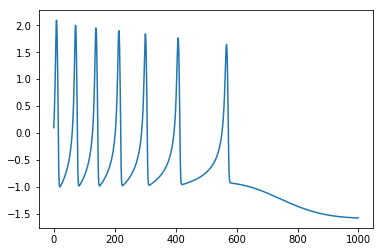

In [8]:
a = 1.0
b = 3.0
c = 1.0
d = 5.0
r = 0.006
s = 4.0
i = 1.3
xnot = -1.5

def hindmarshrose_equation(state, t):
    x, y, z = tf.unstack(state)
    dx = y - a*(x**3) + (b*(x**2)) - z + i
    dy = c - d*(x**2) - y
    dz = r*(s*(x - xnot) - z)
    return tf.stack([dx, dy, dz])

init_state = tf.constant([0.1, 0.1, 0.1], dtype=tf.float64)
t = np.linspace(0, 100, num=1000)
tensor_state, tensor_info = tf.contrib.integrate.odeint(
    hindmarshrose_equation, init_state, t, full_output=True)

sess = tf.Session()
state, info = sess.run([tensor_state, tensor_info])
x, y, z = state.T
plt.plot(x)

#### Hodgkin-Huxley  

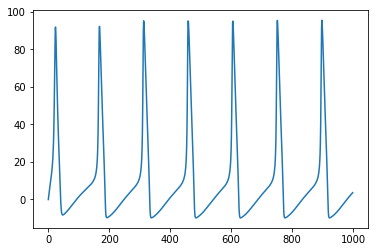

In [9]:
g_K = 36
g_Na = 120
g_L = 0.3
E_K = 12
E_Na = -115
E_L = -10.613
C_m = 1
I = -10

def hodgkinhuxley_equation(state, t):
    i, n, m, h = tf.unstack(state)
    # Alpha and beta functions for each of the channel activation functions
    alpha_n = (0.01*(i + 10))/(tf.exp((i + 10)/10) - 1)
    beta_n = 0.125* tf.exp(i/80)
    alpha_m = (0.1*(i + 25))/(tf.exp((i + 25)/10) - 1)
    beta_m = 4*tf.exp(i/18)
    alpha_h = (0.07*tf.exp(i/20))
    beta_h = 1/(tf.exp((i + 30)/10) + 1)
    # Differential Equations
    di = (g_K*(n**4)*(i - E_K) + g_Na*(m**3)*h*(i - E_Na) + g_L*(i - E_L) - I)*(-1/C_m)
    dn = alpha_n*(1 - n) - beta_n*n
    dm = alpha_m*(1 - m) - beta_m*m
    dh = alpha_h*(1 - h) - beta_h*h
    return tf.stack([di, dn, dm, dh])

init_state = tf.constant([0.1, 0.1, 0.1, 0.1], dtype=tf.float64)
t = np.linspace(0, 100, num=1000)
tensor_state, tensor_info = tf.contrib.integrate.odeint(
    hodgkinhuxley_equation, init_state, t, full_output=True)

sess = tf.Session()
state, info = sess.run([tensor_state, tensor_info])
i, n, m, h = state.T
plt.plot(-i)

#### Coupled Oscillators  

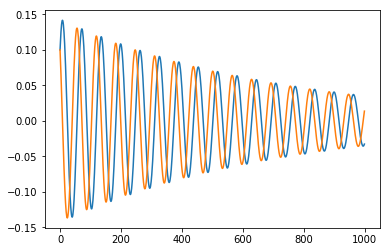

In [10]:
b = 0.007
k1 = 0.27
k2 = 0.027
m = 0.25

def coupledoscillators_equation(state, t):
    x, y, x1, y1 = tf.unstack(state)
    dx = y
    dy = -(k1/m)*x + (k2/m)*x1 - (b/m)*y
    dx1 = y1
    dy1 = (k2/m)*x - (k1/m)*x1 - (b/m)*y1
    return tf.stack([dx, dy, dx1, dy1])

init_state = tf.constant([0.1, 0.1, 0.1, 0.1], dtype=tf.float64)
t = np.linspace(0, 100, num=1000)
tensor_state, tensor_info = tf.contrib.integrate.odeint(
    coupledoscillators_equation, init_state, t, full_output=True)

sess = tf.Session()
state, info = sess.run([tensor_state, tensor_info])
x, y, x1, y1 = state.T
plt.plot(x)
plt.plot(y)